In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt

In [2]:
from Data_cleaning import clean_paloalto

In [3]:
c = clean_paloalto() 
data = c.clean_data()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (29,30,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\User\OneDrive - Danmarks Tekniske Universitet\SAS_030919\6. Semester\BSc\Bachelor2021\Data_cleaning.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Charge Duration (mins)"][df["Charge Duration (mins)"]==" -   "]=0


In [4]:
data.head(1)

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation
0,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,1900-01-01 03:03:32,1900-01-01 01:54:03,6.249457,...,-122.1603,USD,0.0,Plug Out at Vehicle,3,95124,184,114.0,0,37.4446x-122.1603


## Complementary Data cleaning

In [5]:
data['Charging Time (hh:mm:ss)'] = data['Charging Time (hh:mm:ss)'] - dt.datetime(1900, 1, 1, 0, 0, 0)
data['Total Duration (hh:mm:ss)'] = data['Total Duration (hh:mm:ss)'] - dt.datetime(1900, 1, 1, 0, 0, 0)

In [6]:
data['Charging Time (hh:mm:ss)'] = data['Charging Time (hh:mm:ss)'].round('min')
data['Total Duration (hh:mm:ss)'] = data['Total Duration (hh:mm:ss)'].round('min')

In [7]:
data.head(1)

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation
0,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,0 days 03:04:00,0 days 01:54:00,6.249457,...,-122.1603,USD,0.0,Plug Out at Vehicle,3,95124,184,114.0,0,37.4446x-122.1603


In [8]:
data.dtypes

Station Name                           object
MAC Address                            object
Org Name                               object
Start Date                     datetime64[ns]
Start Time Zone                        object
End Date                       datetime64[ns]
End Time Zone                          object
Total Duration (hh:mm:ss)     timedelta64[ns]
Charging Time (hh:mm:ss)      timedelta64[ns]
Energy (kWh)                          float64
GHG Savings (kg)                      float64
Gasoline Savings (gallons)            float64
Port Type                              object
Port Number                             int64
Plug Type                              object
Address 1                              object
City                                   object
State/Province                         object
Postal Code                             int64
Country                                object
Latitude                              float64
Longitude                         

In [9]:
data['StartYear'] = data['Start Date'].dt.year

df16 = data[data['StartYear'] == 2016]
df16.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear
49689,PALO ALTO CA / RINCONADA LIB 1,000D6F00009DCC2B,City of Palo Alto,2016-01-01 02:00:00,PST,2016-01-01 12:04:00,PST,0 days 10:04:00,0 days 03:06:00,10.072230,...,USD,0.0,Customer,1356,94303,604,186.0,13,37.4455x-122.1389,2016
49690,PALO ALTO CA / BRYANT #2,000D6F00009DCFC3,City of Palo Alto,2016-01-01 09:26:00,PST,2016-01-01 11:19:00,PST,0 days 01:53:00,0 days 01:30:00,2.744629,...,USD,0.0,Plug Out at Vehicle,6652,94301,113,90.0,5,37.4465x-122.1621,2016
49691,PALO ALTO CA / BRYANT #1,000D6F0000A20D9E,City of Palo Alto,2016-01-01 09:55:00,PST,2016-01-01 10:49:00,PST,0 days 00:54:00,0 days 00:54:00,5.233959,...,USD,0.0,Customer,9684,95070,54,54.0,4,37.4466x-122.1623,2016
49692,PALO ALTO CA / MPL #6,000D6F00015B7509,City of Palo Alto,2016-01-01 10:13:00,PST,2016-01-01 12:05:00,PST,0 days 01:53:00,0 days 01:52:00,11.342517,...,USD,0.0,Plug Out at Vehicle,2073,94306,113,112.0,7,37.4221x-122.1135,2016
49693,PALO ALTO CA / WEBSTER #1,0024B10000021146,City of Palo Alto,2016-01-01 10:42:00,PST,2016-01-01 13:59:00,PST,0 days 03:16:00,0 days 03:16:00,16.388630,...,USD,0.0,Plug Out at Vehicle,1368,94301,196,196.0,15,37.4483x-122.1583,2016


In [10]:
df16one = df16[df16['Station Name'] == 'PALO ALTO CA / WEBSTER #2']
df16one.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear
49698,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 11:48:00,PST,2016-01-01 15:39:00,PST,0 days 03:50:00,0 days 01:32:00,3.034643,...,USD,0.0,Customer,1216,94024,230,92.0,17,37.4482x-122.1582,2016
49710,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 13:43:00,PST,2016-01-01 17:28:00,PST,0 days 03:45:00,0 days 03:45:00,12.427662,...,USD,0.0,Plug Out at Vehicle,1219,94025,225,225.0,17,37.4482x-122.1582,2016
49732,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 22:43:00,PST,2016-01-02 10:31:00,PST,0 days 11:48:00,0 days 01:51:00,10.752058,...,USD,0.0,Plug Out at Vehicle,1451717005,94301,708,111.0,17,37.4482x-122.1582,2016
49736,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-02 07:09:00,PST,2016-01-02 09:38:00,PST,0 days 02:29:00,0 days 02:29:00,11.160776,...,USD,0.0,Plug Out at Vehicle,1220,94303,149,149.0,17,37.4482x-122.1582,2016
49745,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-02 10:29:00,PST,2016-01-02 13:05:00,PST,0 days 02:36:00,0 days 02:36:00,10.298505,...,USD,0.0,Plug Out at Vehicle,1221,95123,156,156.0,17,37.4482x-122.1582,2016


In [11]:
import datetime as dt
df16one['StartSlot'] = df16one['Start Date'].dt.floor("2H")#apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, 24*(dt.hour // 24))) #,15*(dt.minute // 15)))
df16one['EndSlot'] = df16one['End Date'].dt.ceil("2H")

<ipython-input-11-b1c0c1dc3aa7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16one['StartSlot'] = df16one['Start Date'].dt.floor("2H")#apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, 24*(dt.hour // 24))) #,15*(dt.minute // 15)))
<ipython-input-11-b1c0c1dc3aa7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16one['EndSlot'] = df16one['End Date'].dt.ceil("2H")


In [12]:
df16one.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear,StartSlot,EndSlot
49698,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 11:48:00,PST,2016-01-01 15:39:00,PST,0 days 03:50:00,0 days 01:32:00,3.034643,...,Customer,1216,94024,230,92.0,17,37.4482x-122.1582,2016,2016-01-01 10:00:00,2016-01-01 16:00:00
49710,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 13:43:00,PST,2016-01-01 17:28:00,PST,0 days 03:45:00,0 days 03:45:00,12.427662,...,Plug Out at Vehicle,1219,94025,225,225.0,17,37.4482x-122.1582,2016,2016-01-01 12:00:00,2016-01-01 18:00:00
49732,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 22:43:00,PST,2016-01-02 10:31:00,PST,0 days 11:48:00,0 days 01:51:00,10.752058,...,Plug Out at Vehicle,1451717005,94301,708,111.0,17,37.4482x-122.1582,2016,2016-01-01 22:00:00,2016-01-02 12:00:00
49736,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-02 07:09:00,PST,2016-01-02 09:38:00,PST,0 days 02:29:00,0 days 02:29:00,11.160776,...,Plug Out at Vehicle,1220,94303,149,149.0,17,37.4482x-122.1582,2016,2016-01-02 06:00:00,2016-01-02 10:00:00
49745,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-02 10:29:00,PST,2016-01-02 13:05:00,PST,0 days 02:36:00,0 days 02:36:00,10.298505,...,Plug Out at Vehicle,1221,95123,156,156.0,17,37.4482x-122.1582,2016,2016-01-02 10:00:00,2016-01-02 14:00:00


In [13]:
df16one['ConPerMin'] = df16one['Energy (kWh)'] / df16one['Charge Duration (mins)']

<ipython-input-13-dc299c085e8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16one['ConPerMin'] = df16one['Energy (kWh)'] / df16one['Charge Duration (mins)']


In [14]:
df16one['ConPerMin'].describe()

count    3320.000000
mean             inf
std              NaN
min         0.000008
25%         0.053514
50%         0.076167
75%         0.097152
max              inf
Name: ConPerMin, dtype: float64

In [15]:
df16one['Energy (kWh)'].describe()

count    3320.000000
mean       10.170776
std         8.541733
min         0.000008
25%         5.195533
50%         8.477313
75%        13.014921
max        74.994000
Name: Energy (kWh), dtype: float64

In [16]:
df16one['Charge Duration (mins)'].describe()

count    3320.000000
mean      132.991867
std        88.843795
min         0.000000
25%        76.000000
50%       123.000000
75%       173.250000
max       762.000000
Name: Charge Duration (mins), dtype: float64

In [17]:
df16one = df16one.replace([np.inf], 0);
df16one['ConPerMin'].describe()

count    3320.000000
mean        0.074644
std         0.022796
min         0.000000
25%         0.053450
50%         0.075719
75%         0.097126
max         0.109847
Name: ConPerMin, dtype: float64

## NB! These could be cleaned 

## Creating new, empty data frame

In [18]:
max(df16one['StartSlot'])

Timestamp('2016-12-31 22:00:00')

In [19]:
StartSlot = min(df16one['StartSlot']) #datetime.datetime.now().date()
EndSlot = max(df16one['StartSlot'])
#index = pd.date_range(todays_date, periods=10, freq='D')
index = pd.date_range(start=StartSlot, end=EndSlot, freq="2H") #

columns = df16one.columns #['A', 'B', 'C']
 
df_fill = pd.DataFrame(index=index, columns=columns)
df_fill = df_fill.fillna(0)
 

In [20]:
df_fill

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear,StartSlot,EndSlot,ConPerMin
2016-01-01 10:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 14:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 18:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 14:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-31 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-31 18:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-31 20:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Looking at individual chargings

In [21]:
test = df16one.copy() #head(1)
test

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear,StartSlot,EndSlot,ConPerMin
49698,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 11:48:00,PST,2016-01-01 15:39:00,PST,0 days 03:50:00,0 days 01:32:00,3.034643,...,1216,94024,230,92.0,17,37.4482x-122.1582,2016,2016-01-01 10:00:00,2016-01-01 16:00:00,0.032985
49710,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 13:43:00,PST,2016-01-01 17:28:00,PST,0 days 03:45:00,0 days 03:45:00,12.427662,...,1219,94025,225,225.0,17,37.4482x-122.1582,2016,2016-01-01 12:00:00,2016-01-01 18:00:00,0.055234
49732,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 22:43:00,PST,2016-01-02 10:31:00,PST,0 days 11:48:00,0 days 01:51:00,10.752058,...,1451717005,94301,708,111.0,17,37.4482x-122.1582,2016,2016-01-01 22:00:00,2016-01-02 12:00:00,0.096865
49736,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-02 07:09:00,PST,2016-01-02 09:38:00,PST,0 days 02:29:00,0 days 02:29:00,11.160776,...,1220,94303,149,149.0,17,37.4482x-122.1582,2016,2016-01-02 06:00:00,2016-01-02 10:00:00,0.074905
49745,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-02 10:29:00,PST,2016-01-02 13:05:00,PST,0 days 02:36:00,0 days 02:36:00,10.298505,...,1221,95123,156,156.0,17,37.4482x-122.1582,2016,2016-01-02 10:00:00,2016-01-02 14:00:00,0.066016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95322,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-12-31 14:53:00,PST,2016-12-31 19:51:00,PST,0 days 04:58:00,0 days 02:49:00,16.557000,...,4215,94301,298,169.0,17,37.4482x-122.1582,2016,2016-12-31 14:00:00,2016-12-31 20:00:00,0.097970
95325,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-12-31 15:01:00,PST,2016-12-31 17:14:00,PST,0 days 02:13:00,0 days 02:13:00,13.012000,...,4216,94087,133,133.0,17,37.4482x-122.1582,2016,2016-12-31 14:00:00,2016-12-31 18:00:00,0.097835
95346,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-12-31 17:49:00,PST,2016-12-31 19:59:00,PST,0 days 02:10:00,0 days 01:31:00,2.970000,...,4217,94539,130,91.0,17,37.4482x-122.1582,2016,2016-12-31 16:00:00,2016-12-31 20:00:00,0.032637
95353,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-12-31 20:17:00,PST,2016-12-31 20:37:00,PST,0 days 00:20:00,0 days 00:20:00,1.022000,...,4218,95134,20,20.0,17,37.4482x-122.1582,2016,2016-12-31 20:00:00,2016-12-31 22:00:00,0.051100


In [22]:
result = pd.DataFrame()
result2 = pd.concat([result, final])
result2

NameError: name 'final' is not defined

In [23]:
result = pd.DataFrame()


start = time.time()


for index, row in test.iterrows():

    dftemp = pd.DataFrame(row).T
    dftemp.insert(0, 'Slot', dftemp['StartSlot'])
    
    if dftemp.iloc[-1]['Start Date'] + dftemp.iloc[-1]['Charging Time (hh:mm:ss)'] > (dftemp.iloc[-1]['StartSlot'] + dt.timedelta(hours=2)):
        dftemp.insert(1, 'ChargeMin', (dftemp['StartSlot'] + dt.timedelta(hours=2)) - dftemp['Start Date'])
        dftemp.insert(2, 'TimeLeftCharge', dftemp['Charging Time (hh:mm:ss)'] - dftemp['ChargeMin'])
    else: 
        dftemp.insert(1, 'ChargeMin', dftemp.iloc[-1]['Charging Time (hh:mm:ss)'])
        dftemp.insert(2, 'TimeLeftCharge', dt.timedelta(seconds=0))

    if dftemp.iloc[-1]['Start Date'] + dftemp.iloc[-1]['Total Duration (hh:mm:ss)'] > (dftemp.iloc[-1]['StartSlot'] + dt.timedelta(hours=2)):
        dftemp.insert(3, 'ParkMin', (dftemp['StartSlot'] + dt.timedelta(hours=2)) - dftemp['Start Date'])
        dftemp.insert(4, 'TimeLeftPark', dftemp['Total Duration (hh:mm:ss)'] - dftemp['ChargeMin'])
    else: 
        dftemp.insert(3, 'ParkMin', dftemp.iloc[-1]['Total Duration (hh:mm:ss)'])
        dftemp.insert(4, 'TimeLeftPark', dt.timedelta(seconds=0))                      
 
    while dftemp.iloc[-1]['TimeLeftPark'] > dt.timedelta(seconds=0):
        dftemp2 = pd.DataFrame(dftemp.iloc[-1]).T
        dftemp2['Slot'] = dftemp2['Slot'] + dt.timedelta(hours=2)

        if dftemp2.iloc[-1]['TimeLeftCharge'] > dt.timedelta(hours=2):
            dftemp2['ChargeMin'] = dt.timedelta(hours=2)
            dftemp2['TimeLeftCharge'] = dftemp2['TimeLeftCharge'] - dt.timedelta(hours=2)
        else: 
            dftemp2['ChargeMin'] = dftemp2['TimeLeftCharge']
            dftemp2['TimeLeftCharge'] = dt.timedelta(seconds=0)
            
        if dftemp2.iloc[-1]['TimeLeftPark'] > dt.timedelta(hours=2):
            dftemp2['ParkMin'] = dt.timedelta(hours=2)
            dftemp2['TimeLeftPark'] = dftemp2['TimeLeftPark'] - dt.timedelta(hours=2)
        else: 
            dftemp2['ParkMin'] = dftemp2['TimeLeftPark']
            dftemp2['TimeLeftPark'] = dt.timedelta(seconds=0)        
            
            
        dftemp = pd.concat([dftemp, dftemp2])    

    final = dftemp.reset_index() 
    result = pd.concat([result, final])
    
end = time.time()
print(end - start)

129.27737069129944


In [24]:
cols = ['index', 'Slot', 'ChargeMin', 'TimeLeftCharge', 'ParkMin',
       'TimeLeftPark', 'Station Name', 'Start Date',
        'End Date', 'StartSlot', 'EndSlot',  'Park Duration (mins)', 'Charge Duration (mins)', 'ConPerMin']

In [25]:
result[cols]

,index,Slot,ChargeMin,TimeLeftCharge,ParkMin,TimeLeftPark,Station Name,Start Date,End Date,StartSlot,EndSlot,Park Duration (mins),Charge Duration (mins),ConPerMin
0,49698,2016-01-01 10:00:00,0 days 00:12:00,0 days 01:20:00,0 days 00:12:00,0 days 03:38:00,PALO ALTO CA / WEBSTER #2,2016-01-01 11:48:00,2016-01-01 15:39:00,2016-01-01 10:00:00,2016-01-01 16:00:00,230,92,0.0329853
1,49698,2016-01-01 12:00:00,0 days 01:20:00,0 days 00:00:00,0 days 02:00:00,0 days 01:38:00,PALO ALTO CA / WEBSTER #2,2016-01-01 11:48:00,2016-01-01 15:39:00,2016-01-01 10:00:00,2016-01-01 16:00:00,230,92,0.0329853
2,49698,2016-01-01 14:00:00,0 days 00:00:00,0 days 00:00:00,0 days 01:38:00,0 days 00:00:00,PALO ALTO CA / WEBSTER #2,2016-01-01 11:48:00,2016-01-01 15:39:00,2016-01-01 10:00:00,2016-01-01 16:00:00,230,92,0.0329853
0,49710,2016-01-01 12:00:00,0 days 00:17:00,0 days 03:28:00,0 days 00:17:00,0 days 03:28:00,PALO ALTO CA / WEBSTER #2,2016-01-01 13:43:00,2016-01-01 17:28:00,2016-01-01 12:00:00,2016-01-01 18:00:00,225,225,0.0552341
1,49710,2016-01-01 14:00:00,0 days 02:00:00,0 days 01:28:00,0 days 02:00:00,0 days 01:28:00,PALO ALTO CA / WEBSTER #2,2016-01-01 13:43:00,2016-01-01 17:28:00,2016-01-01 12:00:00,2016-01-01 18:00:00,225,225,0.0552341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,95360,2017-01-01 02:00:00,0 days 02:00:00,0 days 05:20:00,0 days 02:00:00,0 days 06:23:00,PALO ALTO CA / WEBSTER #2,2016-12-31 23:26:00,2017-01-01 10:23:00,2016-12-31 22:00:00,2017-01-01 12:00:00,657,594,0.0992997
3,95360,2017-01-01 04:00:00,0 days 02:00:00,0 days 03:20:00,0 days 02:00:00,0 days 04:23:00,PALO ALTO CA / WEBSTER #2,2016-12-31 23:26:00,2017-01-01 10:23:00,2016-12-31 22:00:00,2017-01-01 12:00:00,657,594,0.0992997
4,95360,2017-01-01 06:00:00,0 days 02:00:00,0 days 01:20:00,0 days 02:00:00,0 days 02:23:00,PALO ALTO CA / WEBSTER #2,2016-12-31 23:26:00,2017-01-01 10:23:00,2016-12-31 22:00:00,2017-01-01 12:00:00,657,594,0.0992997
5,95360,2017-01-01 08:00:00,0 days 01:20:00,0 days 00:00:00,0 days 02:00:00,0 days 00:23:00,PALO ALTO CA / WEBSTER #2,2016-12-31 23:26:00,2017-01-01 10:23:00,2016-12-31 22:00:00,2017-01-01 12:00:00,657,594,0.0992997


In [28]:
resultX = result.reset_index()

In [29]:
pd.set_option('display.max_columns', 500)
resultX[resultX.duplicated('Slot', keep=False)].sort_values('Slot')

,level_0,index,Slot,ChargeMin,TimeLeftCharge,ParkMin,TimeLeftPark,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,Address 1,City,State/Province,Postal Code,Country,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear,StartSlot,EndSlot,ConPerMin
1,1,49698,2016-01-01 12:00:00,0 days 01:20:00,0 days 00:00:00,0 days 02:00:00,0 days 01:38:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 11:48:00,PST,2016-01-01 15:39:00,PST,0 days 03:50:00,0 days 01:32:00,3.03464,1.275,0.381,Level 2,2,J1772,532 Webster St,Palo Alto,California,94301,United States,37.4482,-122.158,USD,0,Customer,1216,94024,230,92,17,37.4482x-122.1582,2016,2016-01-01 10:00:00,2016-01-01 16:00:00,0.0329853
3,0,49710,2016-01-01 12:00:00,0 days 00:17:00,0 days 03:28:00,0 days 00:17:00,0 days 03:28:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 13:43:00,PST,2016-01-01 17:28:00,PST,0 days 03:45:00,0 days 03:45:00,12.4277,5.22,1.56,Level 2,1,J1772,532 Webster St,Palo Alto,California,94301,United States,37.4482,-122.158,USD,0,Plug Out at Vehicle,1219,94025,225,225,17,37.4482x-122.1582,2016,2016-01-01 12:00:00,2016-01-01 18:00:00,0.0552341
2,2,49698,2016-01-01 14:00:00,0 days 00:00:00,0 days 00:00:00,0 days 01:38:00,0 days 00:00:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 11:48:00,PST,2016-01-01 15:39:00,PST,0 days 03:50:00,0 days 01:32:00,3.03464,1.275,0.381,Level 2,2,J1772,532 Webster St,Palo Alto,California,94301,United States,37.4482,-122.158,USD,0,Customer,1216,94024,230,92,17,37.4482x-122.1582,2016,2016-01-01 10:00:00,2016-01-01 16:00:00,0.0329853
4,1,49710,2016-01-01 14:00:00,0 days 02:00:00,0 days 01:28:00,0 days 02:00:00,0 days 01:28:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 13:43:00,PST,2016-01-01 17:28:00,PST,0 days 03:45:00,0 days 03:45:00,12.4277,5.22,1.56,Level 2,1,J1772,532 Webster St,Palo Alto,California,94301,United States,37.4482,-122.158,USD,0,Plug Out at Vehicle,1219,94025,225,225,17,37.4482x-122.1582,2016,2016-01-01 12:00:00,2016-01-01 18:00:00,0.0552341
10,4,49732,2016-01-02 06:00:00,0 days 00:00:00,0 days 00:00:00,0 days 02:00:00,0 days 02:31:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 22:43:00,PST,2016-01-02 10:31:00,PST,0 days 11:48:00,0 days 01:51:00,10.7521,4.516,1.349,Level 2,1,J1772,532 Webster St,Palo Alto,California,94301,United States,37.4482,-122.158,USD,0,Plug Out at Vehicle,1451717005,94301,708,111,17,37.4482x-122.1582,2016,2016-01-01 22:00:00,2016-01-02 12:00:00,0.0968654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8716,1,95325,2016-12-31 16:00:00,0 days 01:14:00,0 days 00:00:00,0 days 01:14:00,0 days 00:00:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-12-31 15:01:00,PST,2016-12-31 17:14:00,PST,0 days 02:13:00,0 days 02:13:00,13.012,5.465,1.633,Level 2,2,J1772,532 Webster St,Palo Alto,California,94301,United States,37.4482,-122.158,USD,0,Plug Out at Vehicle,4216,94087,133,133,17,37.4482x-122.1582,2016,2016-12-31 14:00:00,2016-12-31 18:00:00,0.0978346
8717,0,95346,2016-12-31 16:00:00,0 days 00:11:00,0 days 01:20:00,0 days 00:11:00,0 days 01:59:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-12-31 17:49:00,PST,2016-12-31 19:59:00,PST,0 days 02:10:00,0 days 01:31:00,2.97,1.247,0.373,Level 2,2,J1772,532 Webster St,Palo Alto,California,94301,United States,37.4482,-122.158,USD,0,Plug Out at Vehicle,4217,94539,130,91,17,37.4482x-122.1582,2016,2016-12-31 16:00:00,2016-12-31 20:00:00,0.0326374
8713,1,95322,2016-12-31 16:00:00,0 days 01:42:00,0 days 00:00:00,0 days 02:00:

In [30]:
resultX['ChargeMin'] / np.timedelta64(1, 's') / 60

0        12.0
1        80.0
2         0.0
3        17.0
4       120.0
        ...  
8722    120.0
8723    120.0
8724    120.0
8725     80.0
8726      0.0
Name: ChargeMin, Length: 8727, dtype: float64

In [31]:
resultX['ChargeMin'] = resultX['ChargeMin'] / np.timedelta64(1, 's') / 60

In [32]:
resultX.dtypes

level_0                                 int64
index                                   int64
Slot                           datetime64[ns]
ChargeMin                             float64
TimeLeftCharge                timedelta64[ns]
ParkMin                       timedelta64[ns]
TimeLeftPark                  timedelta64[ns]
Station Name                           object
MAC Address                            object
Org Name                               object
Start Date                     datetime64[ns]
Start Time Zone                        object
End Date                       datetime64[ns]
End Time Zone                          object
Total Duration (hh:mm:ss)     timedelta64[ns]
Charging Time (hh:mm:ss)      timedelta64[ns]
Energy (kWh)                           object
GHG Savings (kg)                       object
Gasoline Savings (gallons)             object
Port Type                              object
Port Number                            object
Plug Type                         

In [33]:
resultX.insert(3, 'EnergyConsumed', resultX['ChargeMin'] * resultX['ConPerMin'].astype(float))

In [34]:
resultX.head()

,level_0,index,Slot,EnergyConsumed,ChargeMin,TimeLeftCharge,ParkMin,TimeLeftPark,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,Address 1,City,State/Province,Postal Code,Country,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear,StartSlot,EndSlot,ConPerMin
0,0,49698,2016-01-01 10:00:00,0.395823,12.0,0 days 01:20:00,0 days 00:12:00,0 days 03:38:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 11:48:00,PST,2016-01-01 15:39:00,PST,0 days 03:50:00,0 days 01:32:00,3.03464,1.275,0.381,Level 2,2,J1772,532 Webster St,Palo Alto,California,94301,United States,37.4482,-122.158,USD,0,Customer,1216,94024,230,92,17,37.4482x-122.1582,2016,2016-01-01 10:00:00,2016-01-01 16:00:00,0.0329853
1,1,49698,2016-01-01 12:00:00,2.638820,80.0,0 days 00:00:00,0 days 02:00:00,0 days 01:38:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 11:48:00,PST,2016-01-01 15:39:00,PST,0 days 03:50:00,0 days 01:32:00,3.03464,1.275,0.381,Level 2,2,J1772,532 Webster St,Palo Alto,California,94301,United States,37.4482,-122.158,USD,0,Customer,1216,94024,230,92,17,37.4482x-122.1582,2016,2016-01-01 10:00:00,2016-01-01 16:00:00,0.0329853
2,2,49698,2016-01-01 14:00:00,0.000000,0.0,0 days 00:00:00,0 days 01:38:00,0 days 00:00:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 11:48:00,PST,2016-01-01 15:39:00,PST,0 days 03:50:00,0 days 01:32:00,3.03464,1.275,0.381,Level 2,2,J1772,532 Webster St,Palo Alto,California,94301,United States,37.4482,-122.158,USD,0,Customer,1216,94024,230,92,17,37.4482x-122.1582,2016,2016-01-01 10:00:00,2016-01-01 16:00:00,0.0329853
3,0,49710,2016-01-01 12:00:00,0.938979,17.0,0 days 03:28:00,0 days 00:17:00,0 days 03:28:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 13:43:00,PST,2016-01-01 17:28:00,PST,0 days 03:45:00,0 days 03:45:00,12.4277,5.22,1.56,Level 2,1,J1772,532 Webster St,Palo Alto,California,94301,United States,37.4482,-122.158,USD,0,Plug Out at Vehicle,1219,94025,225,225,17,37.4482x-122.1582,2016,2016-01-01 12:00:00,2016-01-01 18:00:00,0.0552341
4,1,49710,2016-01-01 14:00:00,6.628086,120.0,0 days 01:28:00,0 days 02:00:00,0 days 01:28:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 13:43:00,PST,2016-01-01 17:28:00,PST,0 days 03:45:00,0 days 03:45:00,12.4277,5.22,1.56,Level 2,1,J1772,532 Webster St,Palo Alto,California,94301,United States,37.4482,-122.158,USD,0,Plug Out at Vehicle,1219,94025,225,225,17,37.4482x-122.1582,2016,2016-01-01 12:00:00,2016-01-01 18:00:00,0.0552341


In [38]:
XX = resultX.groupby("Slot").mean()

In [39]:
XX.head(10)

,level_0,index,EnergyConsumed,ChargeMin
Slot,,,,
2016-01-01 10:00:00,0.0,49698.0,0.395823,12.0
2016-01-01 12:00:00,0.5,49704.0,1.788899,48.5
2016-01-01 14:00:00,1.5,49704.0,3.314043,60.0
2016-01-01 16:00:00,2.0,49710.0,4.860597,88.0
2016-01-01 22:00:00,0.0,49732.0,7.458635,77.0
2016-01-02 00:00:00,1.0,49732.0,3.293423,34.0
2016-01-02 02:00:00,2.0,49732.0,0.000000,0.0
2016-01-02 04:00:00,3.0,49732.0,0.000000,0.0
2016-01-02 06:00:00,2.0,49734.0,1.910066,25.5


In [40]:
XX.index.dtype

dtype('<M8[ns]')

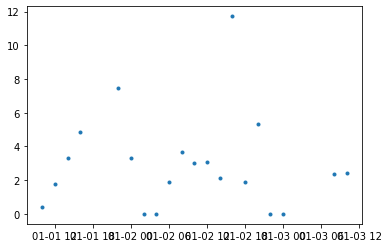

In [42]:
plt.plot(XX.head(20)['EnergyConsumed'], '.')
plt.show()

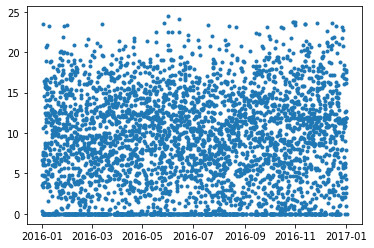

In [137]:
plt.plot(XX['EnergyConsumed'], '.')
plt.show()

In [153]:
XX[XX['EnergyConsumed'] == 0]

,level_0,index,EnergyConsumed,ChargeMin,TimeOnly
Slot,,,,,
2016-01-02 02:00:00,2,49732,0.0,0.0,02:00:00
2016-01-02 04:00:00,3,49732,0.0,0.0,04:00:00
2016-01-02 22:00:00,2,49791,0.0,0.0,22:00:00
2016-01-03 00:00:00,3,49791,0.0,0.0,00:00:00
2016-01-03 12:00:00,3,99616,0.0,0.0,12:00:00
...,...,...,...,...,...
2016-12-23 22:00:00,3,94623,0.0,0.0,22:00:00
2016-12-24 00:00:00,4,94623,0.0,0.0,00:00:00
2016-12-24 02:00:00,5,94623,0.0,0.0,02:00:00


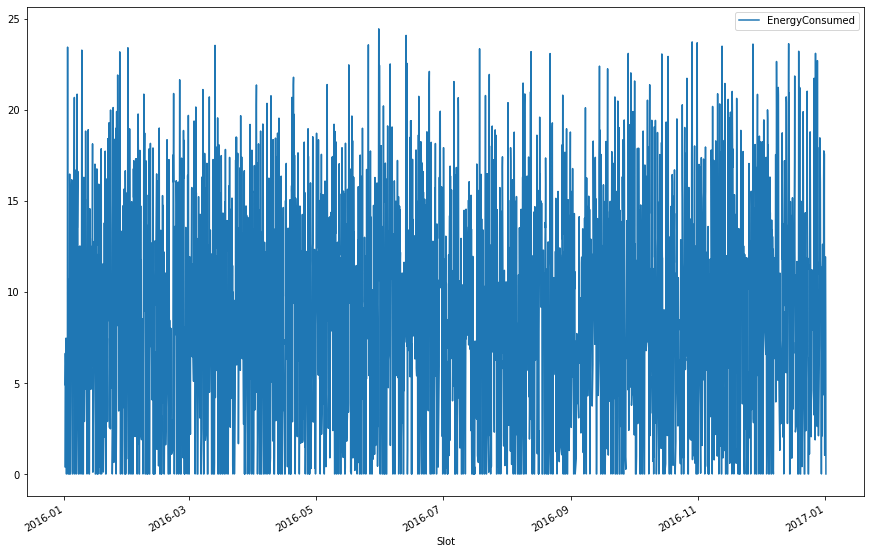

In [152]:
XX.plot(y='EnergyConsumed', figsize=(15,10))
plt.show()

In [120]:
XX['TimeOnly'] = XX.index.time

In [121]:
XX.head()

,level_0,index,EnergyConsumed,ChargeMin,TimeOnly
Slot,,,,,
2016-01-01 10:00:00,0,49698,0.395823,12.0,10:00:00
2016-01-01 12:00:00,1,99408,3.577799,97.0,12:00:00
2016-01-01 14:00:00,3,99408,6.628086,120.0,14:00:00
2016-01-01 16:00:00,2,49710,4.860597,88.0,16:00:00
2016-01-01 22:00:00,0,49732,7.458635,77.0,22:00:00


In [128]:
XXX = XX.groupby('TimeOnly').sum()
XXX.reset_index()
XXX.head()

,level_0,index,EnergyConsumed,ChargeMin
TimeOnly,,,,
00:00:00,677,22644279,1267.359146,14491.0
02:00:00,842,19390138,704.121090,7878.0
04:00:00,1057,20595395,521.752330,6075.0
06:00:00,1255,47744598,1874.008252,24673.0
08:00:00,1172,60812973,3925.964194,53606.0


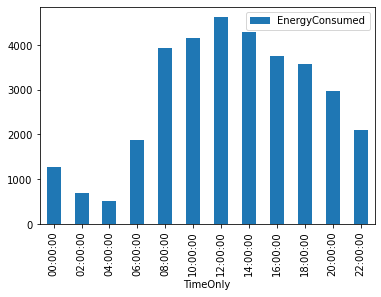

In [139]:
XXX.plot.bar(y='EnergyConsumed')
plt.show()